## Lecture 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Data Types for ndarrays
You should know what ndarrays is. Here we discuss data types for ndarrays.

The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3], dtype=np.float64)
arr3 = np.array([1, 2, 3], dtype=np.int32)

In [ ]:
arr1.dtype

dtype('int64')

In [ ]:
arr2.dtype

dtype('float64')

In [ ]:
arr3.dtype

dtype('int32')

dtypes are a source of NumPy’s flexibility for interacting with data coming from other systems.

The numerical dtypes are named as: a type name, like float or int, followed by a number indicating the number of bits per element.

You can explicitly convert or *cast* an array from one dtype to another using ndarray’s astype method:

In [ ]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

If I cast some floating-point numbers to be of integer dtype, the decimal part will be *truncated*:

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)


array([ 1.25, -9.6 , 42.  ])

string_ refers to Fixed-length ASCII string type (1 byte per character); for example, to create a string dtype with length 10, use 'S10'

In [ ]:
np.array(['1.2',1.2])

array(['1.2', '1.2'], dtype='<U32')

You can also use another array’s dtype attribute:

In [ ]:
int_array = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## 4.2 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library. Unlike some languages like MATLAB, multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication:

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [ ]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [ ]:
x*y

ValueError: ignored

In [ ]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [ ]:
np.dot(x, np.ones(3))

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry-standard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel MKL (Math Kernel Library):

In [ ]:
from numpy.linalg import inv, qr

In [ ]:
X = np.random.randn(5,5)
X

array([[-1.04050749, -0.28777501,  0.05536866, -0.32538675, -0.33914378],
       [-0.10962761, -1.59895522,  0.15805551,  1.18769506, -0.03767505],
       [-1.83422204, -0.69762236,  0.45357857,  0.07957562,  0.35068373],
       [-1.01352656, -0.22078173, -0.43146646,  0.43738908, -0.594407  ],
       [ 0.2430747 , -1.01832855,  1.06274076, -1.19525562, -1.93652165]])

In [ ]:
mat = X.T.dot(X)

In [ ]:
inv(mat)

array([[ 0.43329363, -1.65625657, -2.12420635, -1.69722619,  0.80847284],
       [-1.65625657, 11.41584799, 15.27818631, 12.20994083, -5.53370655],
       [-2.12420635, 15.27818631, 21.70947302, 16.62737064, -7.05976444],
       [-1.69722619, 12.20994083, 16.62737064, 13.6202289 , -6.08350855],
       [ 0.80847284, -5.53370655, -7.05976444, -6.08350855,  3.12731472]])

In [ ]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  2.46232564e-16, -3.40519359e-15,
         7.30715376e-16,  8.20588000e-16],
       [-1.13563251e-15,  1.00000000e+00,  1.77676555e-15,
         3.64054927e-15, -9.99153238e-16],
       [ 5.05749360e-16, -3.66558218e-15,  1.00000000e+00,
        -5.32592962e-15,  2.47470019e-15],
       [ 3.47286832e-16,  2.24111541e-15,  1.01783113e-15,
         1.00000000e+00, -1.88216044e-15],
       [ 6.68860824e-17, -6.61622741e-15,  9.47381007e-16,
        -1.45264948e-15,  1.00000000e+00]])

In [ ]:
mat.dot(inv(mat)).round(2)

array([[ 1.,  0., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0., -0.],
       [ 0., -0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1., -0.],
       [ 0., -0.,  0., -0.,  1.]])

In [ ]:
q, r = qr(mat)

In [ ]:
r

array([[-5.49775394, -5.49379368, -0.23067163,  3.05476129, -1.93960497],
       [ 0.        , -4.78893094,  0.11185044, -3.32449676, -2.80832147],
       [ 0.        ,  0.        , -3.92353117,  5.1720972 ,  1.69453605],
       [ 0.        ,  0.        ,  0.        , -3.9874078 , -0.41188886],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.85983284]])

Test yourself whether you know the following methods for numpy.linalg

  - diag
  - trace
  - det
  - eig
  - inv
  - pinv
  - qr
  - svd
  - solve
  - lstsq

## 4.3 Random Walks

The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
  step = 1 if random.randint(0,1) else -1
  position += step
  walk.append(position)

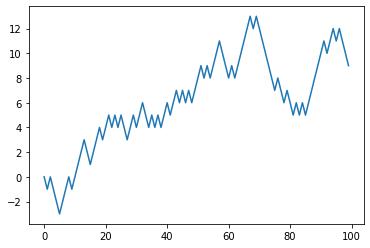

In [ ]:
plt.plot(walk[:100])
plt.show()

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the np.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [ ]:
nsteps = 1000
draws = np.random.randint(0,2, size = nsteps)
steps = np.where(draws >0, 1, -1)
walk = steps.cumsum()

In [ ]:
print(walk.min(), walk.max())

-33 9


# 5. Pandas

Take a look for a general review: https://python-programming.quantecon.org/pandas.html

In [ ]:
import pandas as pd

## 5.1 Series

To get started with pandas, you will need to get comfortable with its two workhorse data structures: *Series* and *DataFrame*.

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Since we did not specify an index for the data, a default one consisting of the integers 0 through $N - 1$ (where $N$ is the length of the data) is created.

In [ ]:
obj.array

<PandasArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Try a range of slicing methods

In [ ]:
obj2["a"]

-5

In [ ]:
obj2[["c", "a", "d"]]

c    3
a   -5
d    4
dtype: int64

In [ ]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [ ]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

Should you have data contained in a Python dictionary, you can create a Series from it by passing the dictionary:

In [ ]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

When you are only passing a dictionary, the index in the resulting Series will respect the order of the keys according to the dictionary’s keys method, which depends on the key insertion order.

See the following, then:

In [ ]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

*NaN* (Not a Number) is considered in pandas to mark missing or NA values

In [ ]:
pd.isna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notna(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series also has these as instance methods:

In [ ]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
obj4.notna()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:

In [ ]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
# see Utah
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

It is like a join if you are familiar with the merging terms

## 5.2 DataFrame

A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). It is somewhat different from Numpy matrix.

In [ ]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [ ]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
frame.head(3)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

In [ ]:
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn’t contained in the dictionary, it will appear with missing values in the result:

In [ ]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


A range of ways to call the first column

In [ ]:
frame2['year']

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [ ]:
frame2.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [ ]:
frame2.loc[:,'year']

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [ ]:
frame2.iloc[:,0]

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

Note that it is different:

In [ ]:
frame2[['year']]

,year
0,2000
1,2001
2,2002
3,2001
4,2002
5,2003


In [ ]:
type(frame2[['year']])

pandas.core.frame.DataFrame

In [ ]:
type(frame2['year'])

pandas.core.series.Series

In [ ]:
# Fill the missing values
frame2['debt'] = np.arange(6.)

In [ ]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


In [ ]:
# Assigning a column that doesn’t exist will create a new column.
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,0.0,True
1,2001,Ohio,1.7,1.0,True
2,2002,Ohio,3.6,2.0,True
3,2001,Nevada,2.4,3.0,False
4,2002,Nevada,2.9,4.0,False
5,2003,Nevada,3.2,5.0,False


In [ ]:
del frame2["eastern"]
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


Another common form of data is a nested dictionary of dictionaries:

In [ ]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
               "Nevada": {2001: 2.4, 2002: 2.9}}
pd.DataFrame(populations)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [ ]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


## 5.3 Index Objects
pandas’s Index objects are responsible for holding the axis labels (including a DataFrame’s column names) and other metadata (like the axis name or names). Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [ ]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])

In [ ]:
obj

a    0
b    1
c    2
dtype: int64

In [ ]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user:

In [ ]:
index[1] = "d"

TypeError: ignored

Immutability makes it safer to share Index objects among data structures:

In [ ]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

Unlike Python sets, a pandas Index can contain duplicate labels:

In [ ]:
pd.Index(["foo", "foo", "bar", "bar"])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

## 5.4 Selection on DataFrame with loc and iloc

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])

Like Series, DataFrame has special attributes loc and iloc for label-based and integer-based indexing, respectively. Since DataFrame is two-dimensional, you can select a subset of the rows and columns with NumPy-like notation using either axis labels (loc) or integers (iloc).

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [ ]:
type(data.loc['Colorado'])

pandas.core.series.Series

The result of selecting a single row is a Series with an index that contains the DataFrame’s column labels. To select multiple roles, creating a new DataFrame, pass a sequence of labels:

In [ ]:
data.loc[["Colorado", "New York"]]

,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


In [ ]:
data.loc["Colorado", ["two", "three"]]

two      5
three    6
Name: Colorado, dtype: int64

We’ll then perform some similar selections with integers using iloc:

In [ ]:
data.iloc[1]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [ ]:
data.iloc[[1,3],:]

,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


In [ ]:
data.iloc[1,[1,2]]

two      5
three    6
Name: Colorado, dtype: int64

Both indexing functions work with slices in addition to single labels or lists of labels:

In [ ]:
data.loc[:"Utah", "two"]

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int64

In [ ]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


Boolean arrays can be used with *loc* but not *iloc*:

In [ ]:
data.loc[data.three >= 2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Some concerns

Integer indexing is useful. -1 is in particular to call the last value.

In [ ]:
example = ['a','b','c']
example[-1]

'c'

Take a look:

In [ ]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser[-1]

KeyError: ignored

Take a look another:

In [ ]:
ser2 = pd.Series(np.arange(3.), index=["a", "b", "c"])
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
ser2[-1]

2.0

For the first wone, we have an index containing 0, 1, and 2, but pandas does not want to guess what the user wants (label-based indexing or position-based)

However, with a noninteger index, there is no such ambiguity.

If you have an axis index containing integers, data selection will always be label oriented. As I said above, if you use loc (for labels) or iloc (for integers) you will get exactly what you want:

In [ ]:
ser.iloc[-1]

2.0

## 5.5 Arithmetic and Data Alignment

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=["a", "c", "e", "f", "g"])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [ ]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                    index=["Utah", "Ohio", "Texas", "Oregon"])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
# Adding these returns a DataFrame with index and columns that are the unions of the ones in each DataFrame:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [ ]:
df3 = df1+df2
df3.loc[:,'d'] = np.nan
df3

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN


In [ ]:
df1.add(df2, fill_value = 0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0
